In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd

# Baca file CSV
df = pd.read_csv("/kaggle/input/ruu-tni-dataset/RUU_TNI.csv")

# Tampilkan 5 baris awal
df.head()


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1909395423883936263,Mon Apr 07 23:58:38 +0000 2025,0,tapi menyetujukan ruu sampah gercep amat kaya ...,1909395423883936263,NaN,NaN,in,"Savannah, GA",0,0,0,https://x.com/leftoverciggs/status/19093954238...,1509121106984448007,leftoverciggs
1,1909395335908409386,Mon Apr 07 23:58:17 +0000 2025,0,Mayan juga ampe 2029 akan denger jawaban yang ...,1909395335908409386,NaN,NaN,in,"Bali, Indonesia",0,0,0,https://x.com/mattyazid1/status/19093953359084...,215584096,mattyazid1
2,1909394723800068422,Mon Apr 07 23:55:51 +0000 2025,0,Padahal yg beredar kemarin adalah yg dukung RU...,1909394723800068422,NaN,NaN,in,NaN,0,0,0,https://x.com/seaminggo/status/190939472380006...,1483620192580403202,seaminggo
3,1909394591306199299,Mon Apr 07 23:55:20 +0000 2025,0,otak dia jalan ga sih,1909394591306199299,NaN,NaN,in,"Savannah, GA",0,0,0,https://x.com/leftoverciggs/status/19093945913...,1509121106984448007,leftoverciggs
4,1909394272958529730,Mon Apr 07 23:54:32 +0000 2025,0,ngetik gweh aja udh belepotan bangun tidur uda...,1909394390281580662,NaN,leftoverciggs,in,"Savannah, GA",0,0,0,https://x.com/leftoverciggs/status/19093943902...,1509121106984448007,leftoverciggs


In [7]:
!pip install sastrawi
!pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.2 MB/s eta 0:00:00


In [12]:
df.columns


Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [13]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Ambil stopword bahasa Indonesia
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

def clean_text(text):
    text = str(text).lower()  # ubah ke huruf kecil
    text = re.sub(r"http\S+|www.\S+", "", text)  # hapus URL
    text = re.sub(r"@\w+|#", "", text)           # hapus mention & hashtag
    text = re.sub(r"[^\w\s]", "", text)          # hapus simbol/tanda baca
    text = re.sub(r"\d+", "", text)              # hapus angka
    text = " ".join([word for word in text.split() if word not in stopwords])  # hapus stopword
    return text

# Terapkan ke kolom teks (asumsinya kolom teks bernama 'text')
df['clean_text'] = df['full_text'].apply(clean_text)
df[['full_text', 'clean_text']].head()


,full_text,clean_text
0,tapi menyetujukan ruu sampah gercep amat kaya ...,menyetujukan ruu sampah gercep kaya dikejar begal
1,Mayan juga ampe 2029 akan denger jawaban yang ...,mayan ampe denger jawaban sama kasih pertanyaa...
2,Padahal yg beredar kemarin adalah yg dukung RU...,padahal yg beredar kemarin yg dukung ruu tni y...
3,otak dia jalan ga sih,otak jalan ga sih
4,ngetik gweh aja udh belepotan bangun tidur uda...,ngetik gweh aja udh belepotan bangun tidur uda...


In [16]:
!pip install transformers
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00:00:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-10

In [17]:
from transformers import pipeline

# Buat pipeline klasifikasi sentimen
sentiment_pipeline = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")


2025-04-11 12:21:22.731115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744374082.972267      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744374083.039306      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [18]:
def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']

df['sentimen'] = df['clean_text'].apply(classify_sentiment)
df[['clean_text', 'sentimen']].head()


,clean_text,sentimen
0,menyetujukan ruu sampah gercep kaya dikejar begal,negative
1,mayan ampe denger jawaban sama kasih pertanyaa...,positive
2,padahal yg beredar kemarin yg dukung ruu tni y...,negative
3,otak jalan ga sih,negative
4,ngetik gweh aja udh belepotan bangun tidur uda...,negative


In [20]:
# Filter tweet yang netral
df_netral = df[df['sentimen'] == 'neutral']

# Tampilkan 10 contoh pertama
df_netral[['clean_text', 'sentimen']].head(10)


,clean_text,sentimen
5,semoga beliau interview struk ringan kebanyaka...,neutral
7,prabowo bicara soal demo ruu tni silakan simak...,neutral
9,prabowo mungkin terdengar ngelantur wawancara ...,neutral
10,presiden prabowo subianto bertemu sejumlah pem...,neutral
14,inget ga kemarin demo depan gedung dpr menyuar...,neutral
17,najwa shihab mengungkap momen pertemuan presid...,neutral
19,yakali ishowspeed ditunjukin kasus korupsi ind...,neutral
21,ruu tni memang soal pensiun draf ruu dibuka pu...,neutral
22,let me guess nempel spanduk buzzer panasbung p...,neutral
23,rapat hotel kewenangan ketua rapat berlaku sej...,neutral


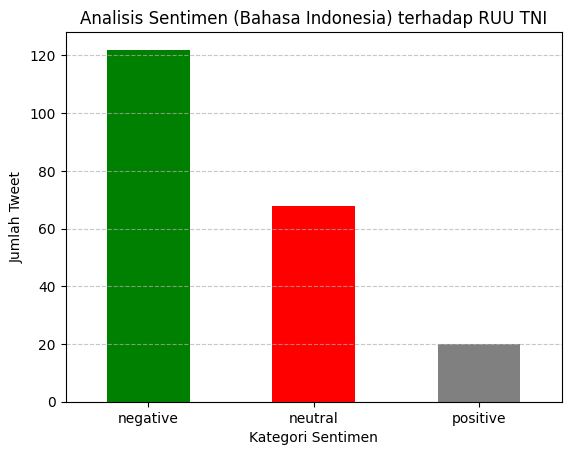

In [19]:
import matplotlib.pyplot as plt

df['sentimen'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Analisis Sentimen (Bahasa Indonesia) terhadap RUU TNI")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def top_terms_by_sentiment(sentiment_label, top_n=10):
    texts = df[df['sentimen'] == sentiment_label]['clean_text']
    vec = CountVectorizer(stop_words=stopwords, max_features=1000)
    X = vec.fit_transform(texts)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Tampilkan top 10 kata
print("Top kata positif:")
print(top_terms_by_sentiment('positive'))

print("\nTop kata negatif:")
print(top_terms_by_sentiment('negative'))


Top kata positif:
[('tni', 9), ('ruu', 8), ('mamah', 6), ('sama', 5), ('aku', 5), ('lah', 4), ('soal', 4), ('kalo', 3), ('orang', 3), ('kemarin', 3)]

Top kata negatif:
[('ruu', 108), ('tni', 107), ('yg', 40), ('demo', 38), ('ga', 30), ('aja', 23), ('sama', 20), ('apa', 18), ('rakyat', 17), ('dibayar', 17)]


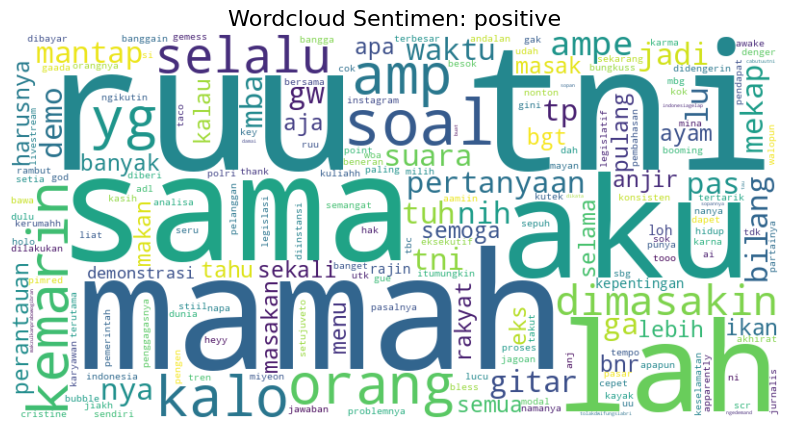

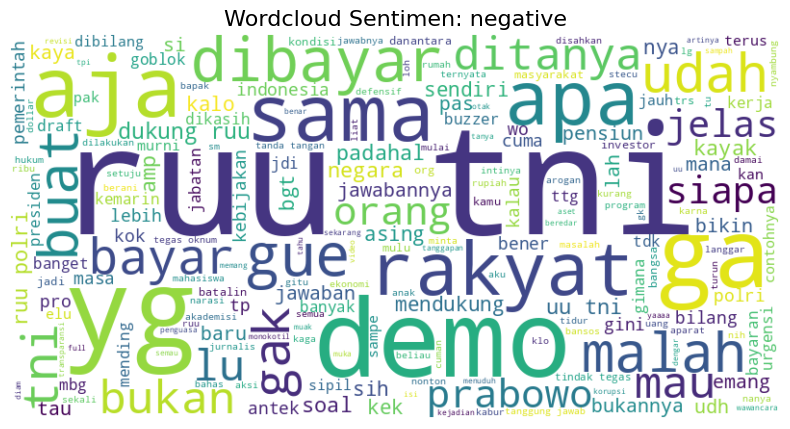

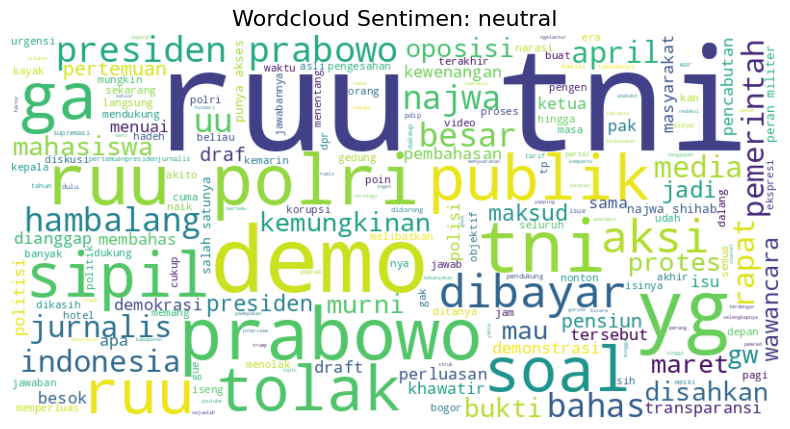

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment_label):
    text = " ".join(df[df['sentimen'] == sentiment_label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Wordcloud Sentimen: {sentiment_label}', fontsize=16)
    plt.axis('off')
    plt.show()

generate_wordcloud('positive')
generate_wordcloud('negative')
generate_wordcloud('neutral')
